In [ ]:
#uploading from google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

'blood cell detection'	    ICBHI_final_database_920
'Colab Notebooks'	    lung_sound_division
 dataset		   'Lung sound doc.gdoc'
 ecgenv			   'lung sound drive'
 ecgproject		   'Machine learning Crash Course.gdoc'
 ICBHI_final_database_679  'Project proposal.gdoc'


In [ ]:
#importing necessary files

In [ ]:
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm 

In [ ]:
#Loading all lung sound file

In [ ]:
path ='/content/drive/MyDrive/ICBHI_final_database_920'

In [ ]:
files = os.listdir(path)
print(len(files))

920


In [ ]:
extracted_features=[]
aaudio=[]

In [ ]:

for filename in tqdm( glob.glob(os.path.join(path, '*.wav')) ):
  audio,sample_rate=librosa.load(filename)
  aaudio.append(audio)
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
  # print(mfccs_features.shape)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  # print(mfccs_scaled_features.shape)
  extracted_features.append(mfccs_scaled_features)
  # print(len(extracted_features))
 



100%|██████████| 920/920 [14:07<00:00,  1.09it/s]


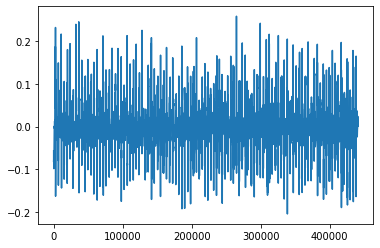

In [ ]:
plt.plot(aaudio[875])

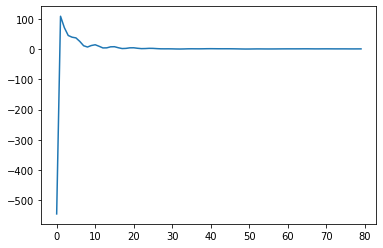

In [ ]:
plt.plot(extracted_features[875])

In [ ]:
df_X=pd.DataFrame(extracted_features)
print(df_X.shape)
df_X
# X_train = df_X.iloc[0:679,0:]
# X_test = df_X.iloc[680:919,-1:]
# print(X_train.shape)
# print(X_test.shape)

(920, 80)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-529.150757,104.431587,70.155006,42.595573,31.283190,27.506977,22.269215,16.563374,15.326893,16.716825,14.707142,8.446252,3.871402,4.893015,8.417205,9.325685,6.879937,3.962098,2.855496,3.370863,4.458168,5.342813,5.608436,4.753032,2.933595,1.404434,1.264880,2.176501,3.008374,3.021715,2.380153,1.698885,1.294755,1.238850,1.441585,1.691590,1.746069,1.693878,1.757436,1.920915,2.005795,1.836306,1.489365,1.252085,1.144488,1.076571,1.158163,1.381553,1.533002,1.380106,1.001571,0.867757,1.115320,1.471709,1.650386,1.538959,1.171270,0.743133,0.463806,0.546412,0.964489,1.428290,1.567916,1.254331,0.754972,0.437209,0.428709,0.637280,0.837949,0.830254,0.598464,0.302137,0.155340,0.276310,0.557402,0.776883,0.760285,0.492271,0.078913,-0.250852
1,-583.074829,95.407684,57.615402,31.388035,28.196554,33.571594,31.646765,22.791107,16.666695,15.631426,14.037862,9.235232,5.834866,7.332277,10.597386,10.617828,7.180680,3.737869,2.680353,3.642111,5.495842,7.373888,8.116691,6.516584,3.175952,0.672749,0.915031,3.079237,4.896942,5.046109,3.818748,2.223233,1.201658,1.279062,2.220854,3.088370,3.011886,2.197924,1.734919,2.253271,3.105819,3.217214,2.303519,1.041093,0.254468,0.255199,0.830960,1.626407,2.253170,2.401405,2.033804,1.478346,1.116575,1.077294,1.194583,1.177025,0.816295,0.264916,-0.043318,0.216773,0.885188,1.436513,1.422287,0.867344,0.230560,-0.055081,0.072147,0.399605,0.598132,0.472449,0.130745,-0.083723,0.077697,0.502223,0.846208,0.875891,0.598904,0.190156,-0.221342,-0.507702
2,-596.955933,116.085419,60.695057,25.555992,26.209230,38.512352,36.051533,18.640724,3.533884,0.808337,5.736544,9.657865,9.137486,5.530644,2.170750,2.102858,5.248150,7.930713,7.101245,4.055319,2.352255,3.208253,4.845040,5.344265,4.519351,3.379910,2.771019,2.687288,2.583400,2.029228,1.290390,1.299299,2.338073,3.126725,2.460672,1.244670,1.296082,2.599376,3.337300,2.632774,1.730682,1.989178,2.806934,2.673271,1.549789,0.882451,1.410920,2.285538,2.392077,1.722982,1.116549,1.135484,1.563458,1.898219,1.854553,1.480343,1.074656,0.964271,1.141710,1.254618,1.045059,0.716619,0.660537,0.909466,1.083677,0.914378,0.573380,0.395859,0.450297,0.553482,0.582518,0.570300,0.561265,0.554979,0.528091,0.420657,0.236455,0.125942,0.203278,0.327269
3,-418.969116,68.048729,48.216747,33.118893,28.064762,26.474794,22.738909,18.174431,15.947225,15.115901,13.330146,10.850938,9.652020,9.752692,9.589607,8.603680,7.715221,7.177804,6.387998,5.581184,6.114264,8.006547,9.114248,7.700382,4.964710,3.453428,3.851614,4.572692,4.400282,3.854682,3.876614,4.287725,4.379181,4.040833,3.684263,3.384859,2.966722,2.508223,2.255157,2.205781,2.199370,2.289483,2.661476,3.177351,3.423134,3.194969,2.732140,2.396837,2.321804,2.398304,2.472200,2.486957,2.492258,2.537297,2.622237,2.658925,2.536553,2.276509,2.027675,1.898038,1.843648,1.786754,1.714325,1.656898,1.631599,1.625961,1.630649,1.623871,1.561625,1.432485,1.270619,1.170009,1.202151,1.317989,1.346326,1.184248,0.956580,0.890454,1.023343,1.127077
4,-441.501221,100.973534,74.025116,43.224682,19.715090,7.853205,5.498144,8.017551,11.749791,14.897519,16.785975,17.148180,15.979633,13.552963,10.306103,6.768775,3.613372,1.563156,1.004815,1.659638,2.763618,3.646559,4.119721,4.325745,4.335412,3.999184,3.176634,2.013054,0.927798,0.336129,0.384830,0.909467,1.594490,2.185873,2.614454,2.965263,3.333231,3.692587,3.896003,3.801207,3.404836,2.856257,2.335146,1.910122,1.522904,1.113456,0.737818,0.528814,0.535959,0.636049,0.629731,0.420558,0.084046,-0.224995,-0.402304,-0.437189,-0.376766,-0.286055,-0.227084,-0.234801,-0.297579,-0.374121,-0.434888,-0.476311,-0.494870,-0.470225,-0.392680,-0.297617,-0.248261,-0.274266,-0.335084,-0.348531,-0.250512,-0.032308,0.254486,0.508914,0.612767,0.496573,0.205847,-0.102860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
print(len(extracted_features))
X = np.array(extracted_features)
print(X.shape)

920
(920, 80)


In [ ]:
X

array([[-5.29150757e+02,  1.04431587e+02,  7.01550064e+01, ...,
         4.92270559e-01,  7.89125562e-02, -2.50851691e-01],
       [-5.83074829e+02,  9.54076843e+01,  5.76154022e+01, ...,
         1.90155968e-01, -2.21342087e-01, -5.07701874e-01],
       [-5.96955933e+02,  1.16085419e+02,  6.06950569e+01, ...,
         1.25941738e-01,  2.03278020e-01,  3.27268809e-01],
       ...,
       [-5.20968140e+02,  1.02006165e+02,  6.21630745e+01, ...,
         3.10973555e-01,  1.85569003e-01,  5.02636470e-02],
       [-4.85266174e+02,  8.50679016e+01,  6.44300232e+01, ...,
         1.99730143e-01,  1.71407685e-01,  1.57385767e-01],
       [-5.20566711e+02,  8.55415115e+01,  6.03820801e+01, ...,
         1.74091443e-01,  4.94120121e-01,  6.36257350e-01]], dtype=float32)

In [ ]:
# Create label for our dataset 

In [ ]:
# Text file data converted to integer data type
diagnosis_data = np.loadtxt("/content/lung_sound_label.txt", skiprows=0, dtype='str')
diagnosis_data.shape

(920, 2)

In [ ]:
diag_data=np.delete(diagnosis_data,0,axis=1)
diag_data

array([['URTI'],
       ['URTI'],
       ['Healthy'],
       ['Asthma'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['URTI'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['LRTI'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['COPD'],
       ['Bronchiectasis'],
       ['Bronchiectasis'],
       ['COPD'],
       ['COPD'],
      

In [ ]:
diag_data=diag_data.reshape(-1)
diag_data = np.where(diag_data == 'Bronchiolotis','Bronchiolitis',diag_data)
diag_data

array(['URTI', 'URTI', 'Healthy', 'Asthma', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'URTI', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'LRTI', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'Bronchiectasis',
       'Bronchiectasis', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'LRTI', 'Bronchiectasis', 'Bronchiectasis', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'URTI',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'Healthy', 'Healthy',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Healthy',
   

In [ ]:
df_y=pd.DataFrame(diag_data)
print(df_y.shape)
df_y=df_y.rename(columns={0:80}) 

(920, 1)


In [ ]:
frames = [df_X, df_y]
result = pd.concat(frames,axis=1, join='inner')

result.iloc[870:919,80]

870              COPD
871              COPD
872           Healthy
873    Bronchiectasis
874    Bronchiectasis
875     Bronchiolitis
876     Bronchiolitis
877           Healthy
878              COPD
879              COPD
880              COPD
881              COPD
882              COPD
883              COPD
884              COPD
885              COPD
886         Pneumonia
887         Pneumonia
888         Pneumonia
889         Pneumonia
890         Pneumonia
891              COPD
892              COPD
893              COPD
894              COPD
895              COPD
896              COPD
897              COPD
898              COPD
899              COPD
900              COPD
901              COPD
902              COPD
903              COPD
904              COPD
905              COPD
906              COPD
907              COPD
908              COPD
909              COPD
910              COPD
911              COPD
912              COPD
913              COPD
914           Healthy
915       

In [ ]:
df_0 = result[result[80] == 'Healthy' ]
df_1 = result[result[80] == 'URTI' ]
df_2 = result[result[80] == 'Asthma' ]
df_3 = result[result[80] == 'COPD' ]
df_4 = result[result[80] == 'LRTI' ]
df_5 = result[result[80] == 'Bronchiectasis' ]
df_6 = result[result[80] == 'Bronchiolitis' ]
df_7 = result[result[80] == 'Pneumonia' ]

In [ ]:
print('df_0 : ',df_0.shape)
print('df_1 : ',df_1.shape)
print('df_2 : ',df_2.shape)
print('df_3 : ',df_3.shape)
print('df_4 : ',df_4.shape)
print('df_5 : ',df_5.shape)
print('df_6 : ',df_6.shape)
print('df_7 : ',df_7.shape)
current_number_of_data=(df_0.shape[0] + df_1.shape[0] + df_2.shape[0] + df_3.shape[0] + df_4.shape[0] +df_5.shape[0] + df_6.shape[0] +df_7.shape[0])
print(current_number_of_data)

df_0 :  (35, 81)
df_1 :  (23, 81)
df_2 :  (1, 81)
df_3 :  (793, 81)
df_4 :  (2, 81)
df_5 :  (16, 81)
df_6 :  (13, 81)
df_7 :  (37, 81)
920


In [ ]:
df_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
41,-541.380188,68.537987,59.601707,50.445423,43.016331,36.347466,29.826488,24.326004,20.608768,18.123642,15.770091,13.168190,10.820773,9.135069,7.921435,6.961161,6.436443,6.468152,6.762479,6.85945,6.559947,5.975694,5.339240,4.811757,4.450720,4.250759,4.196474,4.214333,4.222192,4.152223,3.927944,3.517943,3.024096,2.568781,2.203348,1.938236,1.816984,1.828532,1.841598,1.714998,...,1.173197,1.004121,0.966006,0.978516,0.959677,0.914665,0.893751,0.892725,0.827852,0.660425,0.449089,0.290351,0.228259,0.232258,0.235286,0.198475,0.127394,0.058411,0.018721,0.022795,0.069223,0.128937,0.162699,0.163762,0.150834,0.133260,0.100153,0.063525,0.068500,0.128563,0.181357,0.158040,0.084505,0.055204,0.104898,0.176916,0.208923,0.185749,0.124460,LRTI
71,-441.508087,88.770248,59.256733,36.174934,27.170425,23.676710,17.974573,11.705502,9.764102,11.105886,10.877416,8.019894,6.143611,6.964115,8.071151,7.050928,5.062473,4.646444,6.032744,6.95952,6.078478,4.497324,3.837694,3.929241,3.615903,2.751462,2.348407,2.790562,3.193096,2.696691,1.829485,1.708400,2.368189,2.728382,2.294375,1.801850,2.036475,2.628842,2.652104,2.047855,...,2.089714,2.469044,2.145184,1.433018,1.142851,1.395406,1.516553,1.154674,0.823353,1.054277,1.543768,1.596685,1.152318,0.873849,1.137507,1.440632,1.210140,0.750097,0.773507,1.272899,1.505986,1.051536,0.389269,0.223761,0.533694,0.684573,0.439158,0.285305,0.575572,0.901497,0.735308,0.263136,0.131844,0.503512,0.807946,0.571973,0.126129,0.091393,0.460301,LRTI


In [ ]:
result=result.drop(labels=[41,71], axis=0)
result


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
0,-529.150757,104.431587,70.155006,42.595573,31.283190,27.506977,22.269215,16.563374,15.326893,16.716825,14.707142,8.446252,3.871402,4.893015,8.417205,9.325685,6.879937,3.962098,2.855496,3.370863,4.458168,5.342813,5.608436,4.753032,2.933595,1.404434,1.264880,2.176501,3.008374,3.021715,2.380153,1.698885,1.294755,1.238850,1.441585,1.691590,1.746069,1.693878,1.757436,1.920915,...,1.836306,1.489365,1.252085,1.144488,1.076571,1.158163,1.381553,1.533002,1.380106,1.001571,0.867757,1.115320,1.471709,1.650386,1.538959,1.171270,0.743133,0.463806,0.546412,0.964489,1.428290,1.567916,1.254331,0.754972,0.437209,0.428709,0.637280,0.837949,0.830254,0.598464,0.302137,0.155340,0.276310,0.557402,0.776883,0.760285,0.492271,0.078913,-0.250852,URTI
1,-583.074829,95.407684,57.615402,31.388035,28.196554,33.571594,31.646765,22.791107,16.666695,15.631426,14.037862,9.235232,5.834866,7.332277,10.597386,10.617828,7.180680,3.737869,2.680353,3.642111,5.495842,7.373888,8.116691,6.516584,3.175952,0.672749,0.915031,3.079237,4.896942,5.046109,3.818748,2.223233,1.201658,1.279062,2.220854,3.088370,3.011886,2.197924,1.734919,2.253271,...,3.217214,2.303519,1.041093,0.254468,0.255199,0.830960,1.626407,2.253170,2.401405,2.033804,1.478346,1.116575,1.077294,1.194583,1.177025,0.816295,0.264916,-0.043318,0.216773,0.885188,1.436513,1.422287,0.867344,0.230560,-0.055081,0.072147,0.399605,0.598132,0.472449,0.130745,-0.083723,0.077697,0.502223,0.846208,0.875891,0.598904,0.190156,-0.221342,-0.507702,URTI
2,-596.955933,116.085419,60.695057,25.555992,26.209230,38.512352,36.051533,18.640724,3.533884,0.808337,5.736544,9.657865,9.137486,5.530644,2.170750,2.102858,5.248150,7.930713,7.101245,4.055319,2.352255,3.208253,4.845040,5.344265,4.519351,3.379910,2.771019,2.687288,2.583400,2.029228,1.290390,1.299299,2.338073,3.126725,2.460672,1.244670,1.296082,2.599376,3.337300,2.632774,...,1.989178,2.806934,2.673271,1.549789,0.882451,1.410920,2.285538,2.392077,1.722982,1.116549,1.135484,1.563458,1.898219,1.854553,1.480343,1.074656,0.964271,1.141710,1.254618,1.045059,0.716619,0.660537,0.909466,1.083677,0.914378,0.573380,0.395859,0.450297,0.553482,0.582518,0.570300,0.561265,0.554979,0.528091,0.420657,0.236455,0.125942,0.203278,0.327269,Healthy
3,-418.969116,68.048729,48.216747,33.118893,28.064762,26.474794,22.738909,18.174431,15.947225,15.115901,13.330146,10.850938,9.652020,9.752692,9.589607,8.603680,7.715221,7.177804,6.387998,5.581184,6.114264,8.006547,9.114248,7.700382,4.964710,3.453428,3.851614,4.572692,4.400282,3.854682,3.876614,4.287725,4.379181,4.040833,3.684263,3.384859,2.966722,2.508223,2.255157,2.205781,...,2.289483,2.661476,3.177351,3.423134,3.194969,2.732140,2.396837,2.321804,2.398304,2.472200,2.486957,2.492258,2.537297,2.622237,2.658925,2.536553,2.276509,2.027675,1.898038,1.843648,1.786754,1.714325,1.656898,1.631599,1.625961,1.630649,1.623871,1.561625,1.432485,1.270619,1.170009,1.202151,1.317989,1.346326,1.184248,0.956580,0.890454,1.023343,1.127077,Asthma
4,-441.501221,100.973534,74.025116,43.224682,19.715090,7.853205,5.498144,8.017551,11.749791,14.897519,16.785975,17.148180,15.979633,13.552963,10.306103,6.768775,3.613372,1.563156,1.004815,1.659638,2.763618,3.646559,4.119721,4.325745,4.335412,3.999184,3.176634,2.013054,0.927798,0.336129,0.384830,0.909467,1.594490,2.185873,2.614454,2.965263,3.333231,3.692587,3.896003,3.801207,...,2.856257,2.335146,1.910122,1.522904,1.113456,0.737818,0.528814,0.535959,0.636049,0.629731,0.420558,0.084046,-0.224995,-0.402304,-0.437189,-0.376766,-0.286055,-0.227084,-0.234801,-0.297579,-0.374121,-0.434888,-0.476311,-0.494870,-0.470225,-0.392680,-0.297617,-0.248261,-0.274266,-0.335084,-0.348531,-0.250512,-0.032308,0.254486,0.508914,0.612767,0.496573,0.205847,-0.102860,COPD
...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
3,-418.969116,68.048729,48.216747,33.118893,28.064762,26.474794,22.738909,18.174431,15.947225,15.115901,13.330146,10.850938,9.65202,9.752692,9.589607,8.60368,7.715221,7.177804,6.387998,5.581184,6.114264,8.006547,9.114248,7.700382,4.96471,3.453428,3.851614,4.572692,4.400282,3.854682,3.876614,4.287725,4.379181,4.040833,3.684263,3.384859,2.966722,2.508223,2.255157,2.205781,...,2.289483,2.661476,3.177351,3.423134,3.194969,2.73214,2.396837,2.321804,2.398304,2.4722,2.486957,2.492258,2.537297,2.622237,2.658925,2.536553,2.276509,2.027675,1.898038,1.843648,1.786754,1.714325,1.656898,1.631599,1.625961,1.630649,1.623871,1.561625,1.432485,1.270619,1.170009,1.202151,1.317989,1.346326,1.184248,0.95658,0.890454,1.023343,1.127077,Asthma


In [ ]:
result=result.drop(labels=[3], axis=0)


In [ ]:
df_0 = result[result[80] == 'Healthy' ]
df_1 = result[result[80] == 'URTI' ] 
df_2 = result[result[80] == 'Asthma' ] # we removed this data
df_3 = result[result[80] == 'COPD' ]
df_4 = result[result[80] == 'LRTI' ] # we removed this data
df_5 = result[result[80] == 'Bronchiectasis' ]
df_6 = result[result[80] == 'Bronchiolitis' ]
df_7 = result[result[80] == 'Pneumonia' ]

In [ ]:
print('df_0 : ',df_0.shape)
print('df_1 : ',df_1.shape)
print('df_2 : ',df_2.shape)
print('df_3 : ',df_3.shape)
print('df_4 : ',df_4.shape)
print('df_5 : ',df_5.shape)
print('df_6 : ',df_6.shape)
print('df_7 : ',df_7.shape)

current_number_of_data=(df_0.shape[0] + df_1.shape[0] + df_2.shape[0] + df_3.shape[0] + df_4.shape[0] +df_5.shape[0] + df_6.shape[0] +df_7.shape[0])
print(current_number_of_data)

df_0 :  (35, 81)
df_1 :  (23, 81)
df_2 :  (0, 81)
df_3 :  (793, 81)
df_4 :  (0, 81)
df_5 :  (16, 81)
df_6 :  (13, 81)
df_7 :  (37, 81)
917


In [ ]:
df_0 = result[result[80] == 'Healthy' ]
df_1 = result[result[80] == 'URTI' ] 

df_2 = result[result[80] == 'COPD' ]

df_3 = result[result[80] == 'Bronchiectasis' ]
df_4 = result[result[80] == 'Bronchiolitis' ]
df_5 = result[result[80] == 'Pneumonia' ]

In [ ]:
print('df_0 : ',df_0.shape)
print('df_1 : ',df_1.shape)
print('df_2 : ',df_2.shape)
print('df_3 : ',df_3.shape)
print('df_4 : ',df_4.shape)
print('df_5 : ',df_5.shape)
current_number_of_data=(df_0.shape[0] + df_1.shape[0] + df_2.shape[0] + df_3.shape[0] + df_4.shape[0] +df_5.shape[0])
print(current_number_of_data)

df_0 :  (35, 81)
df_1 :  (23, 81)
df_2 :  (793, 81)
df_3 :  (16, 81)
df_4 :  (13, 81)
df_5 :  (37, 81)
917


In [ ]:
print(result[80].value_counts())

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
Name: 80, dtype: int64


In [ ]:
result
X_train=result.iloc[0:679,0:79]
X_test=result.iloc[680:919,0:79]
y_train=result.iloc[0:679,80]
y_test=result.iloc[680:919,80]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(679, 79)
(237, 79)
(679,)
(237,)


In [ ]:
train = [X_train,y_train]
train_set= pd.concat(train,axis=1, join='inner')

train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80
0,-529.150757,104.431587,70.155006,42.595573,31.283190,27.506977,22.269215,16.563374,15.326893,16.716825,14.707142,8.446252,3.871402,4.893015,8.417205,9.325685,6.879937,3.962098,2.855496,3.370863,4.458168,5.342813,5.608436,4.753032,2.933595,1.404434,1.264880,2.176501,3.008374,3.021715,2.380153,1.698885,1.294755,1.238850,1.441585,1.691590,1.746069,1.693878,1.757436,1.920915,2.005795,1.836306,1.489365,1.252085,1.144488,1.076571,1.158163,1.381553,1.533002,1.380106,1.001571,0.867757,1.115320,1.471709,1.650386,1.538959,1.171270,0.743133,0.463806,0.546412,0.964489,1.428290,1.567916,1.254331,0.754972,0.437209,0.428709,0.637280,0.837949,0.830254,0.598464,0.302137,0.155340,0.276310,0.557402,0.776883,0.760285,0.492271,0.078913,URTI
1,-583.074829,95.407684,57.615402,31.388035,28.196554,33.571594,31.646765,22.791107,16.666695,15.631426,14.037862,9.235232,5.834866,7.332277,10.597386,10.617828,7.180680,3.737869,2.680353,3.642111,5.495842,7.373888,8.116691,6.516584,3.175952,0.672749,0.915031,3.079237,4.896942,5.046109,3.818748,2.223233,1.201658,1.279062,2.220854,3.088370,3.011886,2.197924,1.734919,2.253271,3.105819,3.217214,2.303519,1.041093,0.254468,0.255199,0.830960,1.626407,2.253170,2.401405,2.033804,1.478346,1.116575,1.077294,1.194583,1.177025,0.816295,0.264916,-0.043318,0.216773,0.885188,1.436513,1.422287,0.867344,0.230560,-0.055081,0.072147,0.399605,0.598132,0.472449,0.130745,-0.083723,0.077697,0.502223,0.846208,0.875891,0.598904,0.190156,-0.221342,URTI
2,-596.955933,116.085419,60.695057,25.555992,26.209230,38.512352,36.051533,18.640724,3.533884,0.808337,5.736544,9.657865,9.137486,5.530644,2.170750,2.102858,5.248150,7.930713,7.101245,4.055319,2.352255,3.208253,4.845040,5.344265,4.519351,3.379910,2.771019,2.687288,2.583400,2.029228,1.290390,1.299299,2.338073,3.126725,2.460672,1.244670,1.296082,2.599376,3.337300,2.632774,1.730682,1.989178,2.806934,2.673271,1.549789,0.882451,1.410920,2.285538,2.392077,1.722982,1.116549,1.135484,1.563458,1.898219,1.854553,1.480343,1.074656,0.964271,1.141710,1.254618,1.045059,0.716619,0.660537,0.909466,1.083677,0.914378,0.573380,0.395859,0.450297,0.553482,0.582518,0.570300,0.561265,0.554979,0.528091,0.420657,0.236455,0.125942,0.203278,Healthy
4,-441.501221,100.973534,74.025116,43.224682,19.715090,7.853205,5.498144,8.017551,11.749791,14.897519,16.785975,17.148180,15.979633,13.552963,10.306103,6.768775,3.613372,1.563156,1.004815,1.659638,2.763618,3.646559,4.119721,4.325745,4.335412,3.999184,3.176634,2.013054,0.927798,0.336129,0.384830,0.909467,1.594490,2.185873,2.614454,2.965263,3.333231,3.692587,3.896003,3.801207,3.404836,2.856257,2.335146,1.910122,1.522904,1.113456,0.737818,0.528814,0.535959,0.636049,0.629731,0.420558,0.084046,-0.224995,-0.402304,-0.437189,-0.376766,-0.286055,-0.227084,-0.234801,-0.297579,-0.374121,-0.434888,-0.476311,-0.494870,-0.470225,-0.392680,-0.297617,-0.248261,-0.274266,-0.335084,-0.348531,-0.250512,-0.032308,0.254486,0.508914,0.612767,0.496573,0.205847,COPD
5,-443.015717,106.845009,74.780205,40.033150,16.150705,6.414668,5.623073,7.302594,8.734268,10.403658,12.732615,14.533298,14.256553,11.709416,8.095510,4.730742,2.155521,0.386362,-0.481122,-0.242964,0.982270,2.605332,3.957437,4.724201,4.930986,4.625820,3.759405,2.412742,1.006693,0.128867,0.096150,0.711925,1.474381,2.009725,2.296772,2.515517,2.756296,2.920501,2.871450,2.608378,2.257901,1.928425,1.622127,1.291161,0.939410,0.643456,0.488392,0.502181,0.639889,0.803925,0.879033,0.782782,0.519927,0.197590,-0.029626,-0.055519,0.112112,0.363731,0.561276,0.613902,0.510462,0.305349,0.081931,-0.084572,-0.154605,-0.134121,-0.060220,0.028518,0.112471,0.186834,0.245318,0.275420,0.269898,0.237063,0.195628,0.159288,0.125992,0.080941,0.012094,COPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# =============================== Under Sampling ================================

In [ ]:
df_class_0 = train_set[train_set[80] == 'Healthy' ]
df_class_1 = train_set[train_set[80] == 'URTI' ] 
df_class_2 = train_set[train_set[80] == 'COPD' ]
df_class_3 = train_set[train_set[80] == 'Bronchiectasis' ]
df_class_4 = train_set[train_set[80] == 'Bronchiolitis' ]
df_class_5 = train_set[train_set[80] == 'Pneumonia' ]

In [ ]:
df_2_samp=df_class_2.sample(200) #200

In [ ]:
df_2_samp[80].value_counts()

COPD    200
Name: 80, dtype: int64

In [ ]:
# =============================== Over Sampling ================================

In [ ]:

df_0_samp=df_class_0.sample(200,replace=True)
df_1_samp=df_class_1.sample(200,replace=True)
df_3_samp=df_class_3.sample(200,replace=True)
df_4_samp=df_class_4.sample(200,replace=True)
df_5_samp=df_class_5.sample(200,replace=True)

In [ ]:
train_set=pd.concat([df_0_samp,df_1_samp,df_2_samp,df_3_samp,df_4_samp,df_5_samp], axis=0)
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80
337,-499.908203,106.818558,50.511383,34.640934,32.594517,27.817154,23.044369,17.157806,13.385867,13.001237,12.154593,9.737745,7.893905,8.049900,8.269420,7.157805,5.529810,4.387655,3.872653,3.965771,4.401566,5.100490,5.474571,5.152775,4.290846,3.329111,2.919850,3.358938,3.769737,3.747630,3.239920,2.383015,1.827872,2.028959,2.414551,2.610022,2.360954,2.207821,2.171599,1.890043,1.756893,1.653335,1.315363,1.092770,1.166048,1.204543,1.114000,1.343143,1.291041,1.205568,1.383783,1.364889,1.113987,0.918813,0.760076,0.561242,0.562971,0.436631,0.546761,0.776190,0.870887,1.022849,1.018376,0.914272,0.681129,0.481833,0.496710,0.547432,0.585542,0.677167,0.597389,0.553827,0.393961,0.222497,0.307403,0.602573,0.673341,0.458121,0.272129,Healthy
408,-502.197144,100.089767,60.156837,32.249813,36.410091,38.827045,28.897240,12.880667,10.257165,15.433320,16.862928,8.709432,3.644252,8.582563,12.031121,13.151789,4.517070,5.100175,3.952433,8.338269,4.094107,4.043653,2.129083,5.139353,3.357073,3.079067,0.467272,2.045351,1.885895,2.590905,1.607844,0.429919,1.409815,0.160355,2.805846,0.536957,2.533196,0.477180,2.059415,1.128309,1.915077,0.848574,1.569060,0.349577,1.385204,0.285241,0.848347,1.142845,0.834102,2.081858,0.150008,1.505449,-0.016958,1.605453,0.676078,1.470679,0.553718,1.451602,0.863547,1.469045,0.655708,0.843492,1.020517,0.959048,1.568408,0.134423,1.054242,-0.546730,1.492997,-0.347328,1.565004,-0.279510,1.435643,0.148881,0.820730,-0.099495,0.463337,0.306366,0.775366,Healthy
409,-523.967529,103.453285,59.174797,24.453245,35.196171,35.075016,24.476971,10.760828,8.552436,12.800704,15.879224,6.408697,0.868147,8.934177,7.214874,10.817569,-1.148982,4.129956,1.265770,9.166518,2.287103,4.717571,0.090720,6.170458,1.562419,4.526126,-1.058744,3.988504,0.718324,5.084767,0.576939,2.447834,1.740902,-0.503164,4.267241,-0.673744,4.242397,0.362156,1.676611,1.565276,1.133975,1.167940,2.846168,-1.155908,3.274857,-0.880677,2.275717,1.488637,0.160798,2.989345,-0.798505,1.875226,0.627411,0.907128,1.603635,0.818238,0.816132,2.064207,0.030473,1.976704,0.289998,1.003786,1.270733,0.884560,2.029379,0.676377,0.940959,-1.628438,1.520257,-1.288406,2.863824,-0.343382,2.069602,0.427769,0.003162,0.296232,0.426861,0.741700,1.286301,Healthy
99,-447.981873,63.743530,57.994816,50.644958,43.063553,35.850624,29.444321,24.214045,20.208237,17.079580,14.441744,12.179711,10.433141,9.240495,8.451661,7.903193,7.570761,7.415412,7.299663,7.067969,6.727224,6.380004,6.074881,5.736759,5.315918,4.849135,4.419954,4.048146,3.716992,3.415219,3.174455,3.003883,2.881300,2.764096,2.638700,2.494325,2.327790,2.138948,1.950143,1.772137,1.608976,1.458022,1.328098,1.211660,1.097945,0.988365,0.904636,0.837530,0.754876,0.649248,0.561565,0.514276,0.485937,0.443521,0.383360,0.320172,0.276621,0.257682,0.243383,0.218436,0.205373,0.227023,0.265284,0.276203,0.239844,0.185056,0.162549,0.179161,0.188354,0.165849,0.143476,0.144337,0.139260,0.099944,0.046449,0.016826,0.013354,0.017107,0.027256,Healthy
267,-477.745026,85.523041,57.666359,36.306919,28.804611,29.263861,23.239620,18.243956,11.291933,8.950759,10.475285,8.248799,8.988931,6.231044,6.799814,7.659120,5.825473,7.493815,5.615818,7.129778,6.383377,3.997018,5.124356,3.614903,6.248057,5.171746,3.514806,3.776992,1.664918,4.045313,2.591133,2.284817,2.459651,0.735788,2.951912,1.256444,2.134267,2.105712,1.030480,2.733731,0.310262,1.224731,0.430903,0.173765,2.012184,0.425418,2.228939,0.972133,0.785648,1.066395,-0.936885,1.038858,0.235442,1.690416,2.046363,0.548803,1.922463,0.428935,2.036938,1.793202,1.014693,2.058794,0.423383,2.136856,1.190312,0.401860,-0.043552,-2.339389,-0.728864,-1.106086,0.372916,1.075472,-0.056122,0.935884,-0.749225,0.460854,0.820350,0.666099,1.642259,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# X=result_mod.drop(80,axis='columns')
# y=result_mod[80]
# print(X.shape)
# print(y.shape)


In [ ]:
train_set[80] = np.where(train_set[80] == 'Healthy', 0, train_set[80])
train_set[80] = np.where(train_set[80] == 'URTI', 1, train_set[80])
train_set[80] = np.where(train_set[80] == 'COPD', 2, train_set[80])
train_set[80] = np.where(train_set[80] == 'Bronchiectasis', 3, train_set[80])
train_set[80] = np.where(train_set[80] == 'Bronchiolitis', 4, train_set[80])
train_set[80] = np.where(train_set[80] == 'Pneumonia', 5, train_set[80])

y_train=train_set[80]
y_train

337    0
408    0
409    0
99     0
267    0
      ..
205    5
211    5
210    5
210    5
215    5
Name: 80, Length: 1200, dtype: object

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_train=to_categorical(labelencoder.fit_transform(y_train))

In [ ]:
print(y_train.shape)
y_train

(1200, 6)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# ====================================== Model Creation ==========================================

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D,LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import classification_report
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization

In [ ]:
### Train Test Split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7,stratify=y)
# random_state=6  ,accuracy = 92 of modified_audio
# random_state=7 ,accuracy = 94  of modified_audio

In [ ]:
X_train=train_set.iloc[:,0:79]
X_train=np.array(X_train)
print(X_train.shape)
X_train=X_train.reshape((1200,79,1))
print(X_train.shape)

(1200, 79)
(1200, 79, 1)


In [ ]:
# X_test.shape

In [ ]:
# y_train.shape

In [ ]:
num_labels=y_train.shape[1]
num_labels

6

In [ ]:
y_test=result.iloc[680:919,:]
y_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
683,-696.463318,111.592064,42.725021,39.262146,24.393616,24.185886,16.520351,17.890394,11.504962,11.711390,6.000832,7.956171,5.335180,9.101394,6.931161,9.476728,6.647973,8.848194,5.545714,7.487260,4.564188,6.318869,3.177141,4.229587,1.584899,3.285030,1.302018,2.816266,0.852589,2.083016,0.223594,1.906904,0.092593,1.677781,-0.260919,1.367221,0.423320,1.957520,1.279777,2.493985,...,2.183213,0.504515,0.983594,-0.145173,0.158657,-0.640354,0.081494,-0.745894,0.066934,-0.228554,0.551665,0.395457,1.045195,0.852911,0.969267,0.605199,0.529536,0.587156,0.617796,0.761793,0.517573,0.215145,-0.167424,-0.160268,-0.273220,0.181229,0.319632,0.533519,0.054155,0.217438,-0.337467,0.015896,-0.119158,0.621323,0.474051,0.688411,-0.026029,0.327630,-0.175787,COPD
684,-529.620300,92.119270,62.617867,36.656174,22.399096,16.765718,13.841566,12.120799,13.326737,16.256857,16.980169,14.305079,11.410200,10.744467,11.126740,10.406989,7.737514,4.587382,3.145822,3.419399,3.994869,4.080223,4.001551,4.348509,4.782162,4.524086,3.486488,2.432049,2.177164,2.582370,2.769587,2.267351,1.529186,1.241009,1.469653,1.793794,1.931480,2.014876,2.231194,2.422060,...,1.782281,1.242077,0.954910,0.903485,0.931317,0.929956,0.946959,1.051548,1.138991,1.099547,0.952452,0.790554,0.705453,0.694111,0.683735,0.646688,0.638067,0.688355,0.750277,0.776389,0.724338,0.603159,0.498594,0.437980,0.397664,0.383284,0.380853,0.362028,0.339998,0.327804,0.290680,0.237369,0.248869,0.332969,0.412975,0.437848,0.422633,0.418157,0.422057,URTI
685,-562.804443,61.631458,57.473797,51.216217,44.071201,36.777500,30.148020,24.407177,19.739754,15.989844,13.102694,10.861272,9.182131,7.877239,6.882550,6.051071,5.349164,4.684115,4.040199,3.359756,2.659041,1.940858,1.285306,0.771535,0.508504,0.529365,0.828576,1.318858,1.892821,2.440081,2.888218,3.208966,3.411123,3.520359,3.559076,3.552052,3.512379,3.437912,3.319584,3.175077,...,2.854691,2.712353,2.594080,2.496753,2.423228,2.353644,2.277627,2.177859,2.052538,1.904025,1.751133,1.607622,1.497313,1.414760,1.358201,1.318748,1.290125,1.252291,1.207214,1.154963,1.108773,1.074802,1.060177,1.050594,1.044609,1.038916,1.036578,1.034391,1.034906,1.025388,1.000279,0.949330,0.879949,0.799278,0.727718,0.678542,0.665724,0.683287,0.724112,Pneumonia
686,-601.142212,66.322128,60.735435,52.595852,43.719547,35.359222,28.499168,23.267170,19.503155,16.691730,14.488813,12.595084,10.962576,9.535980,8.352127,7.356241,6.535615,5.793879,5.103359,4.407676,3.741803,3.142001,2.704896,2.474996,2.485089,2.664812,2.915333,3.093451,3.126235,2.985768,2.731918,2.439071,2.201202,2.053066,2.006655,2.021645,2.065019,2.114676,2.182770,2.269429,...,2.471353,2.550553,2.576411,2.538140,2.440010,2.296450,2.118824,1.934018,1.769083,1.650420,1.594321,1.591365,1.608034,1.614318,1.593699,1.540011,1.458313,1.366057,1.278910,1.203428,1.141911,1.081749,1.019999,0.962573,0.917122,0.887910,0.871815,0.859693,0.843816,0.812139,0.759366,0.688758,0.609643,0.530384,0.461399,0.402531,0.356570,0.322943,0.300617,Pneumonia
687,-487.029785,96.795135,57.068138,26.117239,17.101572,20.362968,22.324564,19.195889,14.980795,12.786368,12.426891,12.589046,13.064786,13.635304,13.194331,10.683883,7.049277,4.468567,4.026228,4.598733,4.706526,4.286097,4.242800,4.681140,4.780494,4.036161,2.934131,2.060745,1.334967,0.449430,-0.201988,0.202705,1.593778,2.641670,2.272175,1.074517,0.528939,1.092243,1.816557,1.822298,...,1.053267,1.219692,1.532615,1.706403,1.730047,1.707274,1.675165,1.565369,1.406436,1.322481,1.367578,1.435083,1.421872,1.348856,1.316067,1.380038,1.499371,1.567832,1.563561,1.538213,1.466038,1.268962,1.033592,0.984161,1.122880,1.185597,1.066778,0.911573,0.858913,0.864438,0.855536,0.826773,0.814400,0.790622,0.692225,0.550518,0.484353,0.483567,0.432464,Pneumonia
...,...,...,...,...,...,...,...,...,...

In [ ]:
y_test[80] = np.where(y_test[80] == 'Healthy', 0, y_test[80])
y_test[80] = np.where(y_test[80] == 'URTI', 1, y_test[80])
y_test[80] = np.where(y_test[80] == 'COPD', 2, y_test[80])
y_test[80] = np.where(y_test[80] == 'Bronchiectasis', 3, y_test[80])
y_test[80]= np.where(y_test[80] == 'Bronchiolitis', 4, y_test[80])
y_test[80] = np.where(y_test[80] == 'Pneumonia', 5, y_test[80])

y_test=y_test[80]
y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

683    2
684    1
685    5
686    5
687    5
      ..
915    0
916    0
917    5
918    5
919    5
Name: 80, Length: 237, dtype: object

In [ ]:
y_test=y_test.astype(int)
y_test

683    2
684    1
685    5
686    5
687    5
      ..
915    0
916    0
917    5
918    5
919    5
Name: 80, Length: 237, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_test=to_categorical(labelencoder.fit_transform(y_test))

In [ ]:
print(X_test.shape)
print(y_test.shape)

(237, 79)
(237, 6)


In [ ]:
cnn=Sequential()
#first
cnn.add(Conv1D(filters=16, kernel_size=20, input_shape=(79,1))),
cnn.add(BatchNormalization()),
cnn.add(Activation('relu')),

cnn.add(Conv1D(filters=16, kernel_size=32)),
cnn.add(BatchNormalization()),
cnn.add(Activation('relu')),
    
cnn.add(Conv1D(filters=16, kernel_size=15)),
cnn.add(MaxPooling1D()),

cnn.add(Flatten()) 

cnn.add(Dense(num_labels)),
cnn.add(Activation('softmax'))




In [ ]:
cnn.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, 60, 16)            336       
                                                                 
 module_wrapper_66 (ModuleWr  (None, 60, 16)           64        
 apper)                                                          
                                                                 
 activation_76 (Activation)  (None, 60, 16)            0         
                                                                 
 conv1d_99 (Conv1D)          (None, 29, 16)            8208      
                                                                 
 module_wrapper_67 (ModuleWr  (None, 29, 16)           64        
 apper)                                                          
                                                                 
 activation_77 (Activation)  (None, 29, 16)          

In [ ]:
cnn.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
num_epochs = 500
num_batch_size =64

# checkpointer = ModelCheckpoint(filepath='all_lung_disease.hdf5', 
#                                verbose=1, save_best_only=True)
# start = datetime.now()

cnn.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

cnn.save('last_model')

# duration = datetime.now() - start
# print("Training completed in time: ", duration)




Epoch 1/500
19/19 [==============================] - 2s 37ms/step - loss: 1.3424 - accuracy: 0.5467 - val_loss: 1.4628 - val_accuracy: 0.5359
Epoch 2/500
19/19 [==============================] - 0s 17ms/step - loss: 0.6409 - accuracy: 0.8625 - val_loss: 1.3552 - val_accuracy: 0.5823
Epoch 3/500
19/19 [==============================] - 0s 18ms/step - loss: 0.3458 - accuracy: 0.9183 - val_loss: 1.1360 - val_accuracy: 0.7004
Epoch 4/500
19/19 [==============================] - 0s 19ms/step - loss: 0.2111 - accuracy: 0.9600 - val_loss: 1.1113 - val_accuracy: 0.6287
Epoch 5/500
19/19 [==============================] - 0s 17ms/step - loss: 0.1534 - accuracy: 0.9700 - val_loss: 1.0014 - val_accuracy: 0.6920
Epoch 6/500
19/19 [==============================] - 0s 18ms/step - loss: 0.1055 - accuracy: 0.9867 - val_loss: 0.9608 - val_accuracy: 0.6878
Epoch 7/500
19/19 [==============================] - 0s 18ms/step - loss: 0.0737 - accuracy: 0.9925 - val_loss: 0.9986 - val_accuracy: 0.6540
Epoch 

In [ ]:
# =============================================== load saved model and use it for prediction =======================================

In [ ]:
from keras.models import load_model
model=load_model('/content/last_model')

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
test_accuracy

[2.879209041595459, 0.7805907130241394]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[7.5435679e-07, 2.5499256e-13, 9.9994028e-01, 2.6793899e-08,
        1.7589385e-14, 5.9008231e-05],
       [5.2878978e-08, 9.4480521e-14, 9.9999857e-01, 3.7396905e-11,
        5.9863633e-12, 1.4526627e-06],
       [9.9277503e-11, 1.4955362e-15, 6.6701986e-02, 2.2573057e-07,
        9.3329787e-01, 4.9289230e-09],
       [1.6149458e-15, 1.6213115e-13, 1.1185552e-11, 2.8373905e-15,
        1.6256590e-13, 1.0000000e+00],
       [2.9099087e-06, 4.9359281e-09, 9.9999142e-01, 2.7097007e-12,
        2.9609036e-14, 5.7003303e-06]], dtype=float32)

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print(y_pred_classes)


[2, 2, 4, 5, 2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 4, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 5, 5, 2, 2, 5, 5, 2, 5, 5, 5, 2, 5, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 4, 0, 0, 0]


In [ ]:
y_test_mod=[np.argmax(element) for element in y_test] 
y_test_mod

[2,
 1,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 3,
 4,
 4,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 5,
 5,
 5]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test_mod,predictions=y_pred_classes)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[  7,   0,   1,   0,   2,   0],
       [  2,   1,   1,   0,   1,   0],
       [  3,   2, 173,   6,   0,  13],
       [  0,   0,   9,   0,   0,   0],
       [  1,   0,   3,   1,   0,   0],
       [  3,   0,   3,   0,   1,   4]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

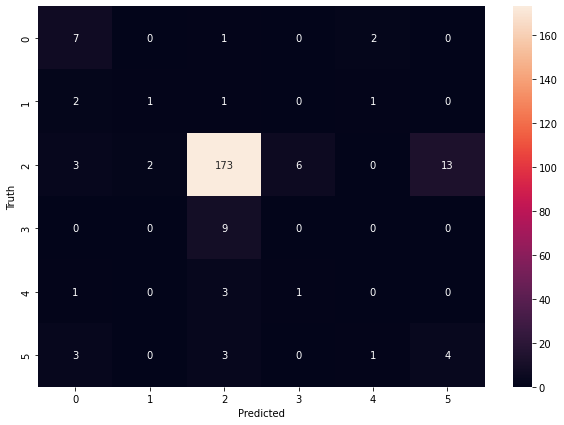

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
cl_rep=classification_report(y_test_mod, y_pred_classes)
print(cl_rep)


              precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.33      0.20      0.25         5
           2       0.91      0.88      0.89       197
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         5
           5       0.24      0.36      0.29        11

    accuracy                           0.78       237
   macro avg       0.32      0.36      0.33       237
weighted avg       0.79      0.78      0.78       237



In [ ]:
filename="/content/COPD.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
# print(predicted_label)
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# prediction_class

pred_classes = [np.argmax(element) for element in predicted_label]
pred_classes

labels = ['Healthy','URTI','COPD','Bronchiectasis','Bronchiolitis','Pneumonia']

ans=labels[pred_classes[0]]
print('\nPredicted Disease:',ans)


Predicted Disease: COPD
